In [3]:
# Load required library for visualizations
library(ggplot2)
library(tidyverse)
# Data
revenue <- c(14574.49, 7606.46, 8611.41, 9175.41, 8058.65, 8105.44, 11496.28, 9766.09, 10305.32, 14379.96, 10713.97, 15433.50)
expenses <- c(12051.82, 5695.07, 12319.20, 12089.72, 8658.57, 840.20, 3285.73, 5821.12, 6976.93, 16618.61, 10054.37, 3803.96)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


#Solutions

In [2]:
# Calculate Profit As The Differences Between Revenue And Expenses
profit <- revenue - expenses
profit

[1]  2522.67  1911.39 -3707.79 -2914.31  -599.92  7265.24  8210.55  3944.97
 [9]  3328.39 -2238.65   659.60 11629.54

In [7]:
# Calculate Tax As 30% Of Profit And Round To 2 Decimal Points
tax <- round(0.30 * profit, 2)
tax

[1]   756.80   573.42 -1112.34  -874.29  -179.98  2179.57  2463.17  1183.49
 [9]   998.52  -671.60   197.88  3488.86

In [8]:
# Calculate Profit Remaining After Tax Is Deducted
profit.after.tax <- profit - tax
profit.after.tax

[1]  1765.87  1337.97 -2595.45 -2040.02  -419.94  5085.67  5747.38  2761.48
 [9]  2329.87 -1567.05   461.72  8140.68

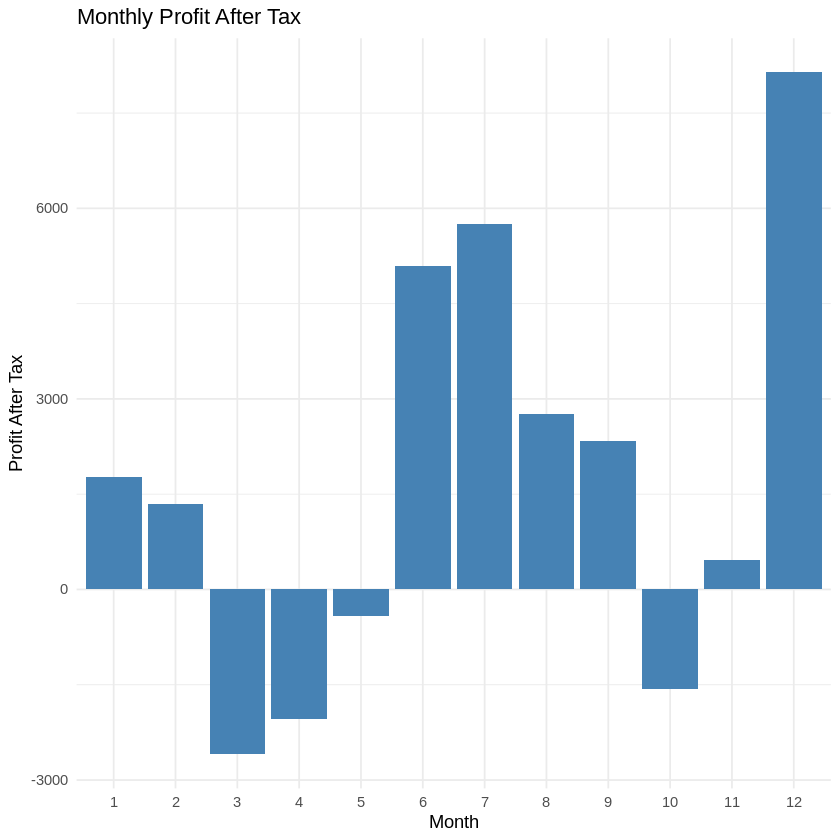

In [14]:
#Visualize Profit after tax

# Create a data frame for visualization
data <- data.frame(
  Month = 1:12,
  Profit_After_Tax = profit.after.tax
)

# Create the bar chart using ggplot2
ggplot(data, aes(x = factor(Month), y = Profit_After_Tax)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Monthly Profit After Tax", x = "Month", y = "Profit After Tax") +
  theme_minimal()


In [13]:
# Calculate The Profit Margin As Profit After Tax Over Revenue
# Round To 2 Decimal Points, Then Multiply By 100 To Get %
profit.margin <- round(profit.after.tax / revenue, 2) * 100
profit.margin

[1]  12  18 -30 -22  -5  63  50  28  23 -11   4  53

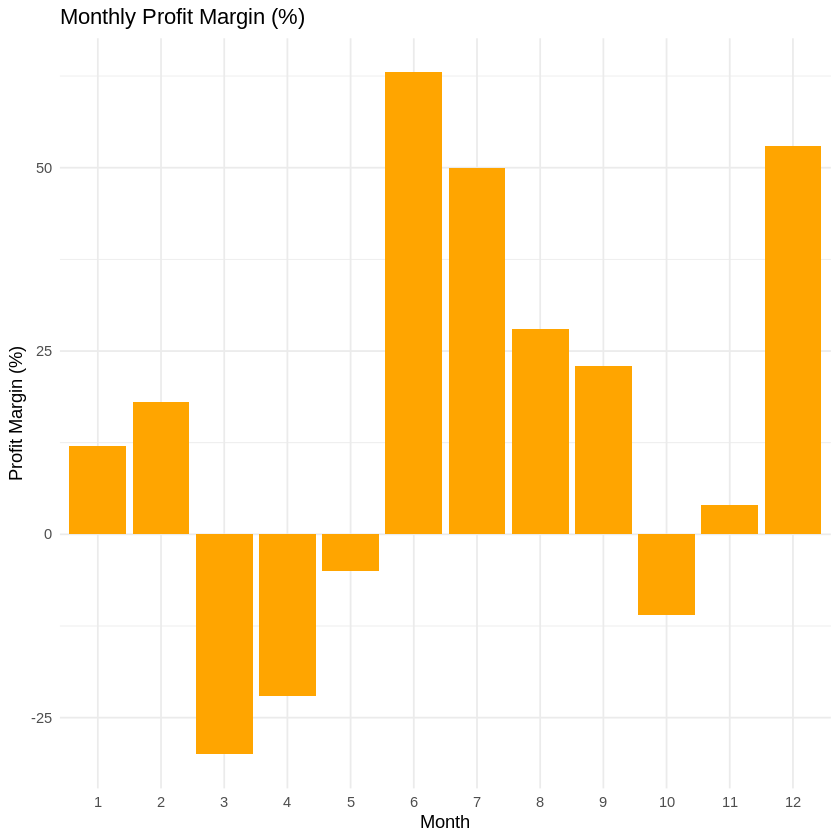

In [15]:
# Visualize Profit Margin

# Create a data frame for visualization
data <- data.frame(
  Month = 1:12,
  Profit_margin = profit.margin
)
# Create the bar chart using ggplot2
ggplot(data, aes(x = factor(Month), y = profit.margin)) +
  geom_bar(stat = "identity", fill = "orange") +
  labs(title = "Monthly Profit Margin (%)", x = "Month", y = "Profit Margin (%)") +
  theme_minimal()

In [16]:
# Calculate The Mean Profit After Tax For The 12 Months
mean_pat <- mean(profit.after.tax)
mean_pat

[1] 1750.682

In [17]:
# Find The Months With Above-Mean Profit After Tax
good.months <- profit.after.tax > mean_pat
good.months

[1]  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE

In [18]:
# Bad Months Are The Opposite Of Good Months
bad.months <- !good.months
bad.months

[1] FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE

In [19]:
# The Best Month Is The Month With The Highest Profit After Tax
best.month <- profit.after.tax == max(profit.after.tax)
best.month

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE

In [20]:
# The Worst Month Is The Month With The Lowest Profit After Tax
worst.month <- profit.after.tax == min(profit.after.tax)
worst.month

[1] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE